In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('listings.csv')

location_data = df[['id', 'latitude', 'longitude', 'price']]

print(location_data)

                        id   latitude  longitude      price
0                     6499  38.697500  -9.197680     $73.00
1                    25659  38.712410  -9.127060    $106.00
2                    29396  38.711560  -9.129870     $75.00
3                    29720  38.711080  -9.159790  $1,065.00
4                    29915  38.745710  -9.152640     $95.00
...                    ...        ...        ...        ...
24259  1371008748532246224  38.721219  -9.167266  $7,411.00
24260  1371091268401865721  38.717077  -9.147289    $200.00
24261  1371216308686882761  38.732713  -9.145716    $110.00
24262  1371223704329486155  38.700770  -9.168950     $59.00
24263  1371344702478038562  38.698704  -9.421072    $200.00

[24264 rows x 4 columns]


In [3]:
df = location_data

df.dropna(subset=['price'], inplace=True)
print(df)

                        id   latitude  longitude      price
0                     6499  38.697500  -9.197680     $73.00
1                    25659  38.712410  -9.127060    $106.00
2                    29396  38.711560  -9.129870     $75.00
3                    29720  38.711080  -9.159790  $1,065.00
4                    29915  38.745710  -9.152640     $95.00
...                    ...        ...        ...        ...
24259  1371008748532246224  38.721219  -9.167266  $7,411.00
24260  1371091268401865721  38.717077  -9.147289    $200.00
24261  1371216308686882761  38.732713  -9.145716    $110.00
24262  1371223704329486155  38.700770  -9.168950     $59.00
24263  1371344702478038562  38.698704  -9.421072    $200.00

[21079 rows x 4 columns]


In [4]:
df.describe(include='all')

,id,latitude,longitude,price
count,2.107900e+04,21079.000000,21079.000000,21079
unique,NaN,NaN,NaN,715
top,NaN,NaN,NaN,$90.00
freq,NaN,NaN,NaN,324
mean,5.158733e+17,38.760779,-9.207088,NaN
std,5.389536e+17,0.111611,0.111845,NaN
min,6.499000e+03,38.675790,-9.486970,NaN
25%,2.439107e+07,38.710890,-9.278425,NaN
50%,5.551403e+17,38.718257,-9.147780,NaN
75%,1.060832e+18,38.746614,-9.135129,NaN


In [5]:
print(df['price'].isnull().sum())

0


In [6]:
print(df.describe())

                 id      latitude     longitude
count  2.107900e+04  21079.000000  21079.000000
mean   5.158733e+17     38.760779     -9.207088
std    5.389536e+17      0.111611      0.111845
min    6.499000e+03     38.675790     -9.486970
25%    2.439107e+07     38.710890     -9.278425
50%    5.551403e+17     38.718257     -9.147780
75%    1.060832e+18     38.746614     -9.135129
max    1.371345e+18     39.304030     -8.862100


In [7]:
df['price'] = df['price'].replace('[\$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\luigi\AppData\Local\Temp\ipykernel_21204\289536781.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True)


In [8]:
df.describe()

,id,latitude,longitude,price
count,2.107900e+04,21079.000000,21079.000000,21079.000000
mean,5.158733e+17,38.760779,-9.207088,156.624982
std,5.389536e+17,0.111611,0.111845,576.065191
min,6.499000e+03,38.675790,-9.486970,8.000000
25%,2.439107e+07,38.710890,-9.278425,60.000000
50%,5.551403e+17,38.718257,-9.147780,87.000000
75%,1.060832e+18,38.746614,-9.135129,132.000000
max,1.371345e+18,39.304030,-8.862100,20000.000000


In [9]:
from matplotlib import pyplot as plt

In [10]:
prices = df['price'].to_numpy()

{'whiskers': [<matplotlib.lines.Line2D at 0x262963336b0>,
 'caps': [<matplotlib.lines.Line2D at 0x262964dc140>,
 'boxes': [<matplotlib.lines.Line2D at 0x26296367830>],
 'medians': [<matplotlib.lines.Line2D at 0x262964dc710>],
 'fliers': [<matplotlib.lines.Line2D at 0x262964dca10>],
 'means': []}

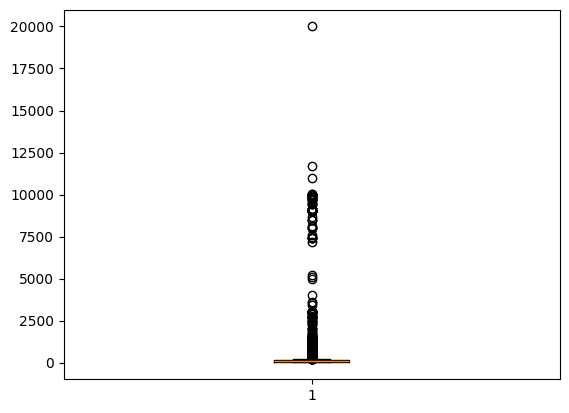

In [11]:
plt.boxplot(prices)

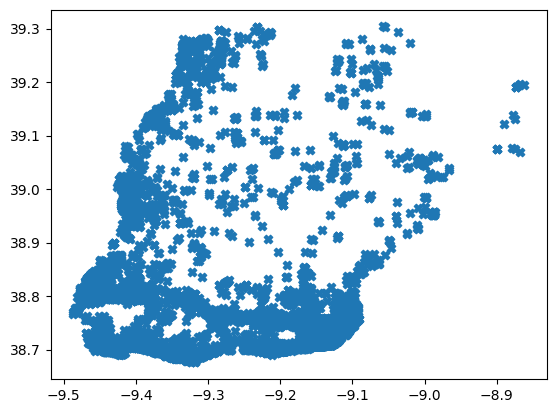

In [12]:
plt.scatter(df['longitude'], df['latitude'], marker='X')

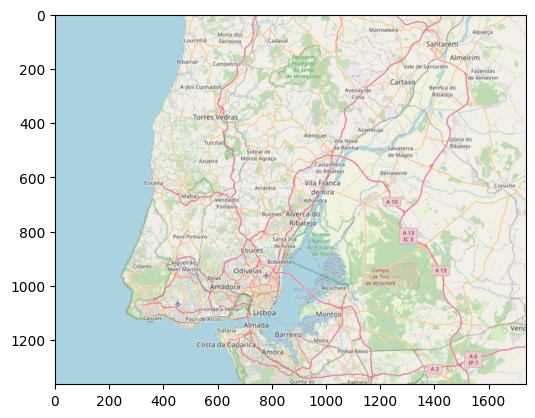

In [13]:
import matplotlib.image as mpimg

img = mpimg.imread('Lisbon Map.png')
plt.imshow(img)
plt.show()

Looks quite similar!

In [56]:
df.to_csv('location_data.csv')

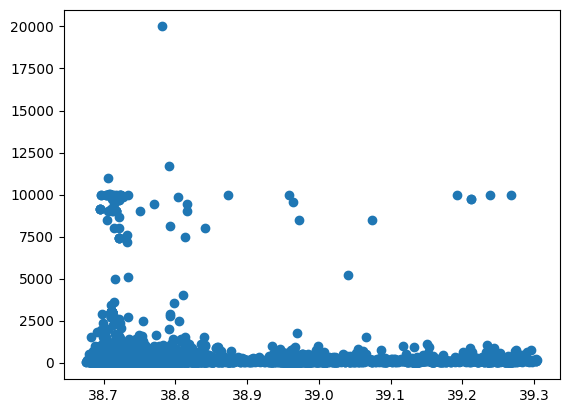

In [14]:
plt.scatter(df['latitude'], df['price'])

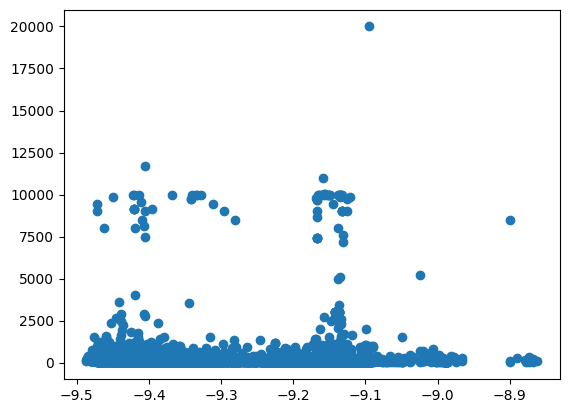

In [15]:
plt.scatter(df['longitude'], df['price'])

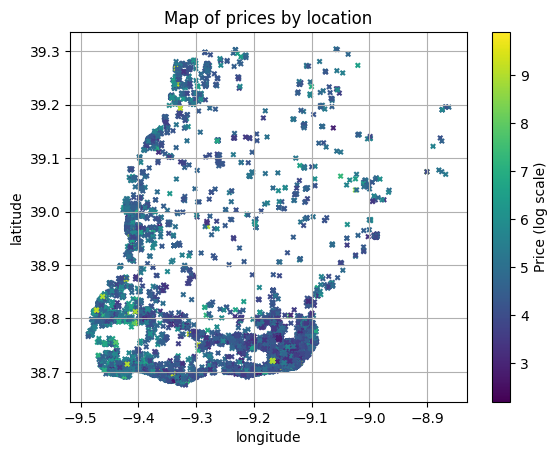

In [26]:
transformed_price = np.log1p(df['price'])

sc = plt.scatter(df['longitude'], df['latitude'], c=transformed_price, cmap='viridis', s=10, marker='x')
plt.colorbar(sc, label='Price (log scale)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Map of prices by location')
plt.grid(True)
plt.show()